##### Copyright 2024 Google LLC.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Prompting with Sherlock_Jr., a 44 minute silent movie

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Sherlock_Jr.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

This notebook provides a quick example of how to prompt Gemini 1.5 Pro using a video file and an image.

In [2]:
!pip install -U -q google-generativeai

In [3]:
import google.generativeai as genai

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

Upload a [video](https://en.wikipedia.org/wiki/Sherlock_Jr.) to the File API


In [5]:
!curl -O https://storage.googleapis.com/generativeai-downloads/data/Sherlock_Jr_FullMovie.mp4

--2024-05-14 20:27:32--  https://storage.googleapis.com/generativeai-downloads/data/Sherlock_Jr_FullMovie.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 142.251.162.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331623233 (316M) [video/mp4]
Saving to: ‘Sherlock_Jr_FullMovie.mp4.1’

Sherlock_Jr_FullMov 100%[===================>] 316.26M   101MB/s    in 3.2s    

2024-05-14 20:27:35 (99.7 MB/s) - ‘Sherlock_Jr_FullMovie.mp4.1’ saved [331623233/331623233]



In [6]:
video_file_name = "Sherlock_Jr_FullMovie.mp4"

print(f"Uploading file...")
video_file = genai.upload_file(path=video_file_name)
print(f"Completed upload: {video_file.uri}")

Uploading file...
Completed upload: https://generativelanguage.googleapis.com/v1beta/files/glbiqhf9pwoq


## Get File

After uploading the file, you can verify the API has successfully received the files by calling `files.get`.

In [7]:
import time

while video_file.state.name == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = genai.get_file(video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Video processing com

## Generate Content

After the video has been uploaded, you can make `GenerateContent` requests that reference the File API URI.

In [8]:
prompt = "Describe this video."

model = genai.GenerativeModel(model_name="models/gemini-1.5-pro-latest")

response = model.generate_content([video_file, prompt],
                                  request_options={"timeout": 600})
print(response.text)

This video is a black and white silent film called "Sherlock Jr." starring Buster Keaton, originally released in 1924. The film begins with the title card and credits, followed by a brief introduction to the main character, a film projectionist who aspires to be a detective. The film then follows Buster Keaton as he attempts to solve a crime and win over his love interest. The video ends with a classic "happily ever after" scene in the projection room and a closing card. 



Find a scene in the video.

In [9]:
!curl -O https://storage.googleapis.com/generativeai-downloads/data/water_tower.png

--2024-05-14 20:33:29--  https://storage.googleapis.com/generativeai-downloads/data/water_tower.png
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.215.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42928 (42K) [image/png]
Saving to: ‘water_tower.png’

water_tower.png     100%[===================>]  41.92K  --.-KB/s    in 0.001s  

2024-05-14 20:33:29 (55.1 MB/s) - ‘water_tower.png’ saved [42928/42928]



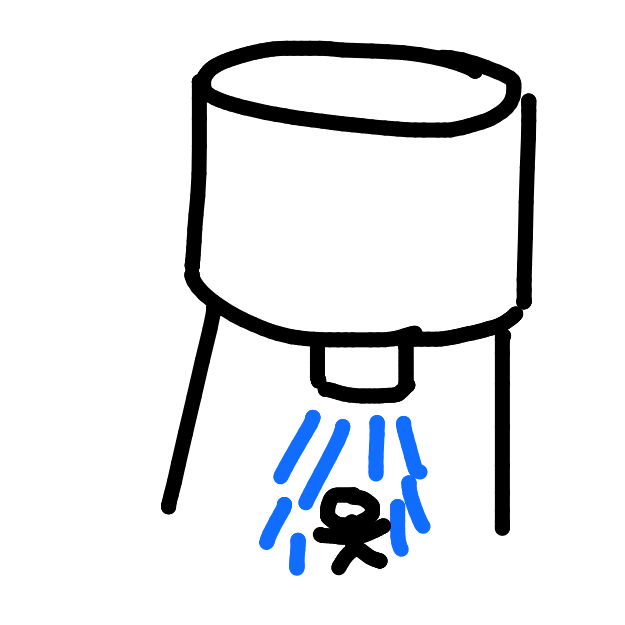

In [10]:
import PIL.Image
img = PIL.Image.open('water_tower.png')
img

In [11]:
image_file_name = "water_tower.png"
image_file = genai.upload_file(path=image_file_name)

In [12]:
response = model.generate_content(["Where did we see something like this in the video? At what timecode?", video_file, image_file],
                                  request_options={"timeout": 600})
print(response.text)

You are referring to the moment when a man falls from a water tower after climbing up to escape from the train. This moment happens in the movie at 15:26. 



## Delete File

Files are automatically deleted after 2 days or you can manually delete them using `files.delete()`.

In [13]:
genai.delete_file(video_file.name)
genai.delete_file(image_file.name)

## Learning more

* Learn more about the [File API](https://github.com/google-gemini/cookbook/blob/main/quickstarts/File_API.ipynb).